In [73]:
!pip install SCALECAST

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast.multiseries import export_model_summaries
from scalecast import GridGenerator

daily = pd.read_csv('/content/drive/MyDrive/lmwn-dataset/daily.csv')
weekly = pd.read_csv('/content/drive/MyDrive/lmwn-dataset/weekly.csv')
hourly = pd.read_csv('/content/drive/MyDrive/lmwn-dataset/hourly.csv')

In [75]:
daily

,order_date,order_date_of_month,dow,orders,delivery_fee,restaurant_id,food_price,is_coupon_used,is_bkk,is_chain_res,...,S,cooking_time_in_seconds_trf,delivery_time_in_seconds_trf,total_time_waiting,%_coupon_used,%_chain_res,%_S_resturant_orders,%_L_resturant_orders,orders_per_rest,%_CASH
0,1,2,1,364,10.0,78,130.0,31,161,47,...,130.0,755.0,493.0,1262.0,0.085165,0.129121,0.357143,0.368132,4.666667,0.947802
1,2,3,2,385,10.0,83,145.0,32,169,76,...,136.0,789.0,509.0,1345.0,0.083117,0.197403,0.353247,0.358442,4.638554,0.932468
2,3,4,3,365,10.0,65,140.0,43,156,64,...,145.0,788.0,520.0,1385.0,0.117808,0.175342,0.397260,0.353425,5.615385,0.964384
3,4,5,4,373,10.0,77,140.0,32,149,50,...,164.0,698.0,472.0,1229.0,0.085791,0.134048,0.439678,0.353887,4.844156,0.951743
4,5,6,5,357,10.0,81,130.0,39,135,54,...,141.0,727.0,524.0,1311.0,0.109244,0.151261,0.394958,0.383754,4.407407,0.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,21,4,1151,0.0,143,140.0,1118,545,145,...,541.0,615.0,412.0,1066.0,0.971329,0.125977,0.470026,0.272806,8.048951,0.798436
361,362,22,5,1092,0.0,140,141.0,1046,535,191,...,492.0,625.5,421.0,1091.5,0.957875,0.174908,0.450549,0.267399,7.800000,0.776557
362,363,23,6,1202,0.0,147,148.5,1160,560,200,...,541.0,647.0,429.0,1118.0,0.965058,0.166389,0.450083,0.278702,8.176871,0.792013
363,364,24,0,1020,0.0,129,153.0,980,520,195,...,476.0,683.0,421.5,1130.0,0.960784,0.191176,0.466667,0.279412,7.906977,0.749020


In [76]:
from datetime import datetime, date, timedelta

d0 = date(2022, 1, 3)
daily['fake_date'] = daily['order_date'].apply(lambda x : d0+timedelta(days=x-1))
daily.sample(20)

,order_date,order_date_of_month,dow,orders,delivery_fee,restaurant_id,food_price,is_coupon_used,is_bkk,is_chain_res,...,cooking_time_in_seconds_trf,delivery_time_in_seconds_trf,total_time_waiting,%_coupon_used,%_chain_res,%_S_resturant_orders,%_L_resturant_orders,orders_per_rest,%_CASH,fake_date
34,35,5,0,332,10.0,75,167.0,33,164,54,...,684.0,517.0,1259.0,0.099398,0.162651,0.445783,0.262048,4.426667,0.924699,2022-02-06
148,149,26,2,536,7.5,109,120.0,514,310,94,...,708.5,488.5,1287.5,0.958955,0.175373,0.412313,0.253731,4.917431,0.789179,2022-05-31
285,286,8,6,731,5.0,124,140.0,728,395,77,...,677.0,495.0,1177.0,0.995896,0.105335,0.332421,0.381669,5.895161,0.815321,2022-10-15
119,120,28,1,574,10.0,106,115.0,560,305,111,...,704.0,490.0,1254.0,0.975610,0.193380,0.442509,0.297909,5.415094,0.801394,2022-05-02
29,30,31,2,373,10.0,85,134.0,31,151,48,...,712.5,483.0,1255.0,0.083110,0.128686,0.412869,0.345845,4.388235,0.941019,2022-02-01
321,322,13,0,995,9.0,125,150.0,973,549,131,...,698.5,468.0,1233.0,0.977889,0.131658,0.445226,0.274372,7.960000,0.793970,2022-11-20
100,101,9,3,440,10.0,93,112.5,439,204,66,...,709.0,508.0,1273.0,0.997727,0.150000,0.461364,0.329545,4.731183,0.865909,2022-04-13
52,53,23,4,368,10.0,85,120.0,38,183,47,...,613.5,486.5,1175.5,0.103261,0.127717,0.442935,0.271739,4.329412,0.942935,2022-02-24
49,50,20,1,359,10.0,85,120.0,34,159,41,...,615.0,516.0,1165.0,0.094708,0.114206,0.409471,0.320334,4.223529,0.930362,2022-02-21
113,114,22,2,557,10.0,102,120.0,557,316,103,...,657.0,452.0,1188.0,1.000000,0.184919,0.464991,0.276481,5.460784,0.831239,2022-04-26


In [77]:
dt0 = datetime(2022, 1, 3, 0, 0, 0)
hourly['fake_hour'] = hourly['hrs_index'].apply(lambda x : dt0+timedelta(hours=x-1))
hourly['%_CASH'] = hourly['CASH']/hourly['orders']
hourly.sample(20)

,hrs_index,order_hour,order_date_of_month,dow,orders,delivery_fee,restaurant_id,food_price,is_coupon_used,is_bkk,...,RLP,L,M,S,cooking_time_in_seconds_trf,delivery_time_in_seconds_trf,total_time_waiting,%_coupon_used,fake_hour,%_CASH
4781,5808,0,27,5,6,5.0,3,95.0,6,1,...,0,5,1,0,636.5,362.0,1032.0,1.000000,2022-09-01 23:00:00,0.833333
51,85,13,5,4,29,10.0,21,125.0,2,12,...,0,11,6,12,689.0,465.0,1267.5,0.068966,2022-01-06 12:00:00,1.000000
5722,6936,0,12,3,2,17.5,2,82.0,2,1,...,0,2,0,0,464.0,720.0,1184.0,1.000000,2022-10-18 23:00:00,0.500000
1559,2058,18,25,2,33,10.0,28,130.0,5,13,...,2,11,6,16,591.0,643.0,1255.5,0.151515,2022-03-29 17:00:00,0.878788
3806,4629,21,8,4,26,5.0,16,149.5,26,15,...,3,12,6,8,827.5,449.0,1338.5,1.000000,2022-07-14 20:00:00,0.615385
5614,6814,22,6,4,15,15.0,10,150.0,15,9,...,0,6,4,5,440.0,513.0,1093.0,1.000000,2022-10-13 21:00:00,1.000000
1225,1647,15,8,6,31,0.0,19,150.0,3,22,...,6,5,8,18,868.0,567.0,1393.5,0.096774,2022-03-12 14:00:00,0.806452
6796,8287,7,6,3,15,0.0,9,130.0,14,5,...,2,5,3,7,576.0,421.0,1229.0,0.933333,2022-12-14 06:00:00,0.600000
3825,4650,18,9,5,41,5.0,33,150.0,41,29,...,2,13,17,11,727.0,447.0,1306.0,1.000000,2022-07-15 17:00:00,0.853659
2469,3096,0,7,4,5,10.0,3,85.0,5,3,...,0,0,3,2,843.0,580.0,1343.0,1.000000,2022-05-11 23:00:00,1.000000


In [78]:
weekly['%_CASH'] = weekly['CASH']/weekly['orders']

In [79]:
weekly['fake_week'] = weekly['week_index'].apply(lambda x : dt0+timedelta(days=(x-1)*7))

In [80]:
weekly

,week_index,orders,delivery_fee,restaurant_id,food_price,is_coupon_used,is_bkk,is_chain_res,is_main_dish,CASH,LINEMAN_CREDIT_CARD,RLP,L,M,S,cooking_time_in_seconds_trf,delivery_time_in_seconds_trf,total_time_waiting,%_CASH,fake_week
0,1.0,2250,10.0,106,135.0,218,941,367,1732,2133.0,0.0,117.0,775.0,591.0,884.0,749.0,512.0,1298.5,0.948000,2022-01-03
1,2.0,2529,10.0,109,130.0,259,1109,381,1991,2372.0,0.0,157.0,830.0,641.0,1058.0,733.0,497.0,1264.0,0.937920,2022-01-10
2,3.0,2624,10.0,114,138.0,230,1095,402,1974,2437.0,0.0,187.0,930.0,683.0,1011.0,742.0,493.0,1264.0,0.928735,2022-01-17
3,4.0,2551,10.0,116,129.0,199,1085,382,1913,2376.0,0.0,175.0,830.0,650.0,1071.0,719.0,490.5,1243.0,0.931399,2022-01-24
4,5.0,2507,10.0,119,138.0,286,1151,384,1859,2325.0,0.0,182.0,801.0,614.0,1092.0,697.5,504.0,1253.0,0.927403,2022-01-31
5,6.0,2493,10.0,120,140.0,290,1191,379,1834,2291.0,0.0,202.0,681.0,690.0,1122.0,670.0,515.0,1238.0,0.918973,2022-02-07
6,7.0,2734,10.0,125,130.0,342,1331,328,2080,2478.0,0.0,256.0,792.0,675.0,1267.0,693.0,508.0,1253.0,0.906364,2022-02-14
7,8.0,2612,10.0,119,125.0,298,1274,327,1975,2391.0,0.0,221.0,759.0,655.0,1198.0,678.0,505.0,1225.5,0.915391,2022-02-21
8,9.0,2970,10.0,129,130.0,311,1484,555,2095,2685.0,0.0,285.0,811.0,777.0,1382.0,744.5,502.0,1301.0,0.904040,2022-02-28
9,10.0,2877,10.0,129,132.0,336,1435,437,2023,2572.0,0.0,305.0,807.0,898.0,1172.0,712.0,520.0,1273.5,0.893987,2022-03-07


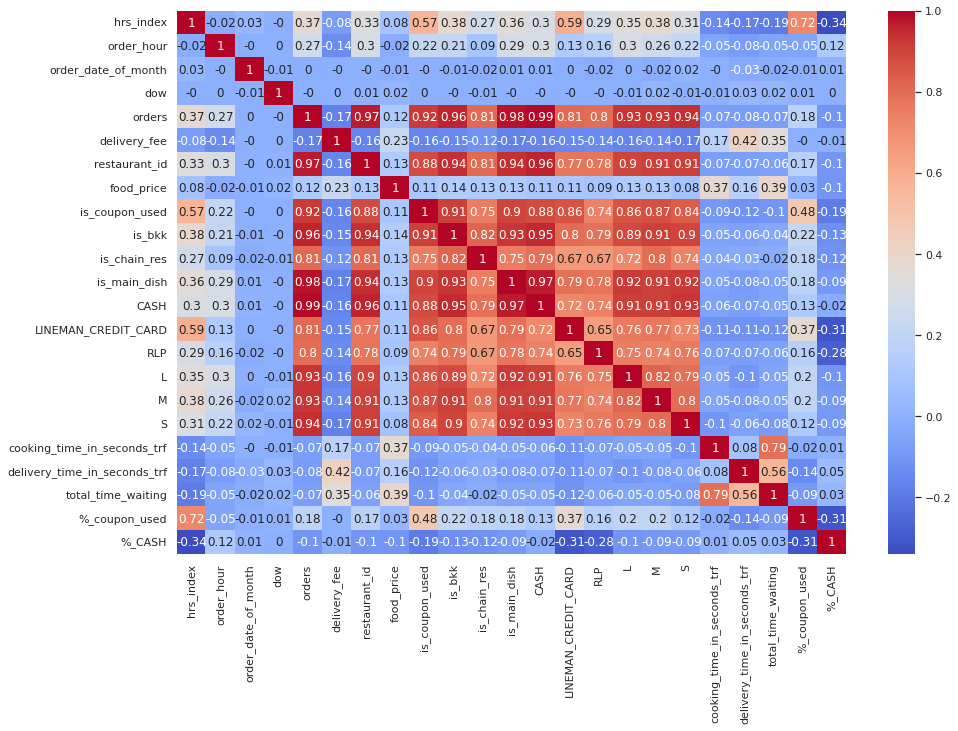

In [81]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(np.round(hourly.corr(),2), cmap="coolwarm", annot=True)

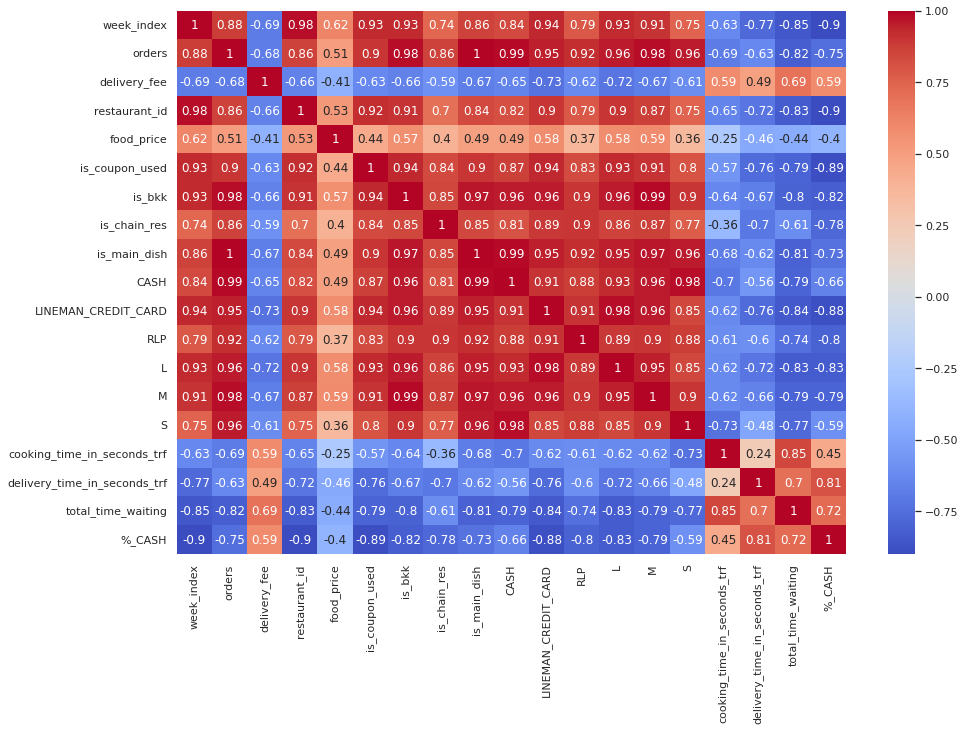

In [82]:
sns.heatmap(np.round(weekly.corr(),2), cmap="coolwarm", annot=True)

In [83]:
f_daily = Forecaster(y=daily['orders'],current_dates=daily['fake_date'])
f_daily

Forecaster(
    DateStartActuals=2022-01-03T00:00:00.000000000
    DateEndActuals=2023-01-02T00:00:00.000000000
    Freq=D
    N_actuals=365
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

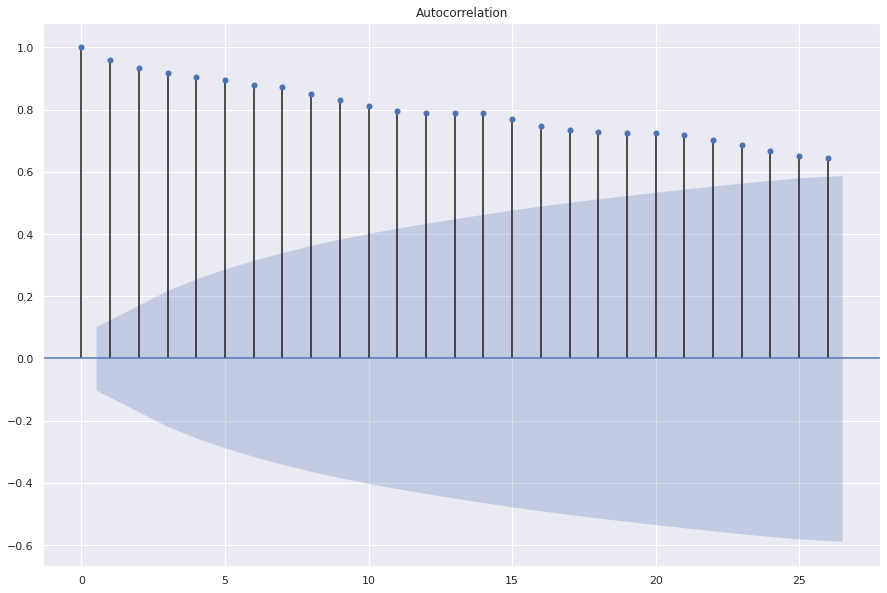

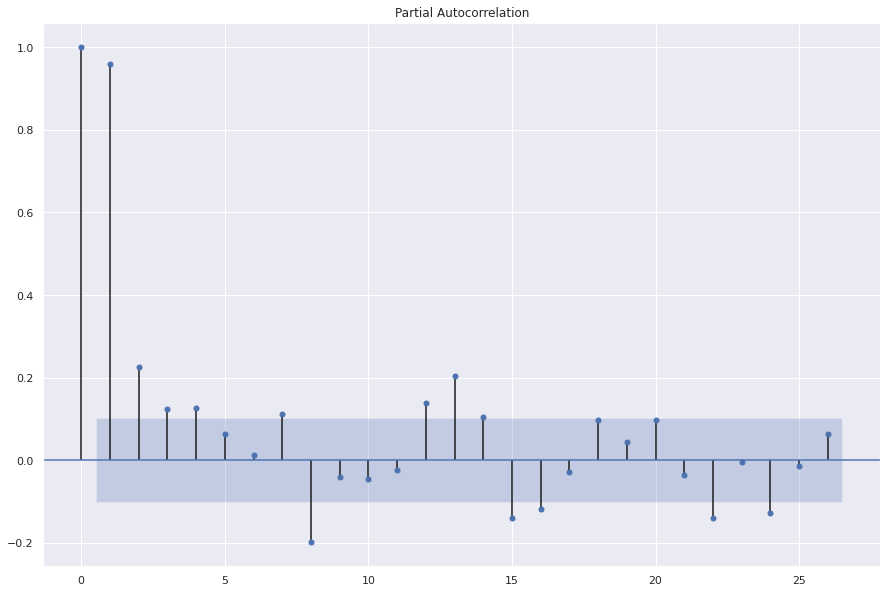

In [84]:
f_daily.plot_acf()
f_daily.plot_pacf()
plt.show()

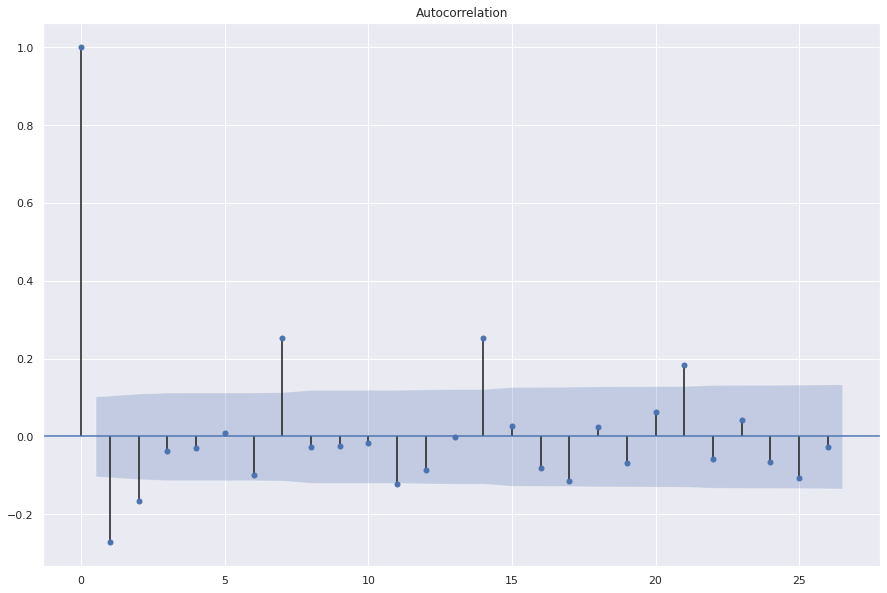

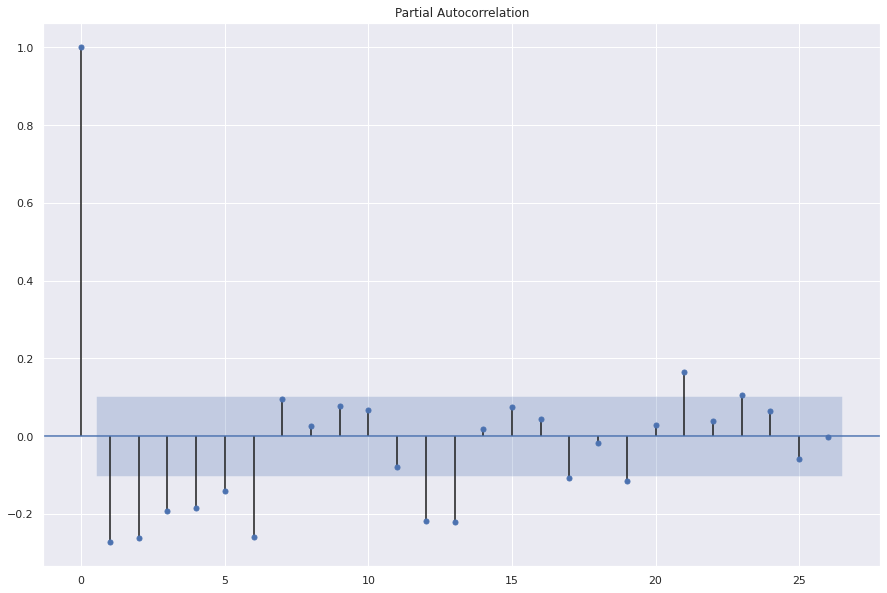

In [85]:
f_daily.plot_acf(diffy=True)
f_daily.plot_pacf(diffy=True)
plt.show()

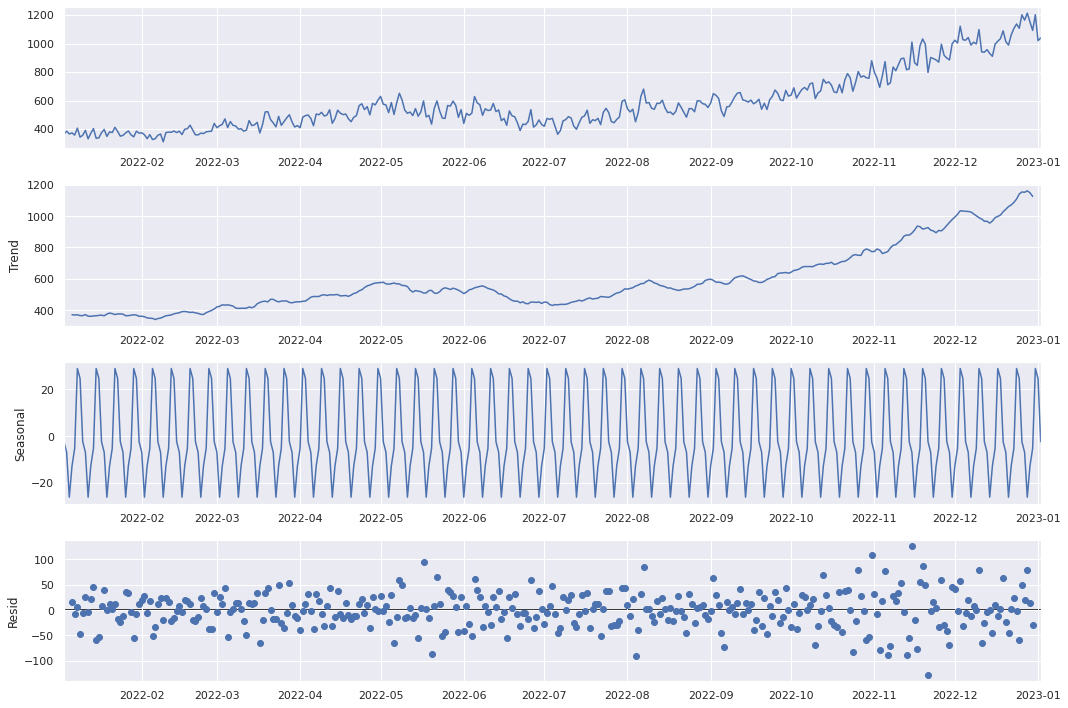

In [86]:
f_daily.seasonal_decompose().plot()
plt.show()

In [87]:
# set forecast horizon of 28 days
f_daily.generate_future_dates(28)    
# set 20% testing length    
f_daily.set_test_length(.2)
# set aside 4 days for validation
f_daily.set_validation_length(20)
f_daily.add_seasonal_regressors(
        'week',
        'month',
        raw=False,
        sincos=True,
    )
f_daily.add_ar_terms(30)

# Import Validation Grids

In [88]:
# download template validation grids (will not overwrite existing Grids.py file by default)
models = ('mlr','elasticnet','knn','rf','gbt','xgboost','mlp')
GridGenerator.get_example_grids(overwrite=False)
GridGenerator.get_mv_grids(overwrite=False)

# Approach 1 : Univariable Forcasting

In [89]:
sel_models = ('rf','gbt')
f_daily.tune_test_forecast(models,feature_importance=True)

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinat

[12:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

  warnings.warn(

  warnings.warn(

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  

In [90]:
f_daily.set_estimator('combo')
f_daily.manual_forecast(how='weighted')

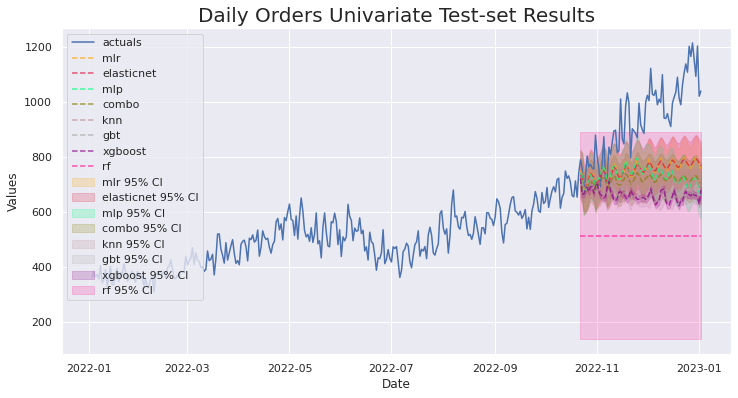

In [91]:
f_daily.plot_test_set(ci=True,order_by='LevelTestSetMAPE')
plt.title('Daily Orders Univariate Test-set Results',size=20)
plt.show()

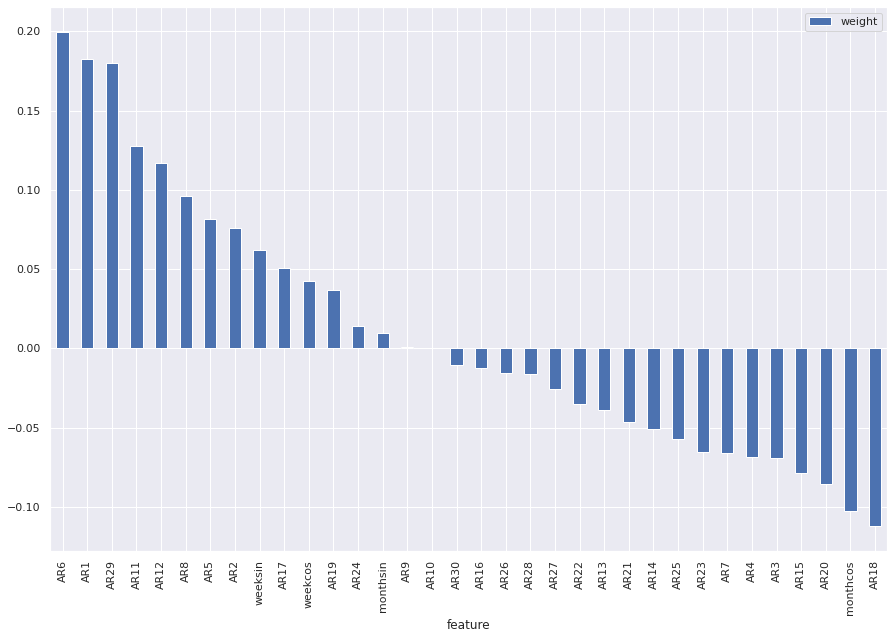

In [92]:
f_daily.export_feature_importance('mlp').plot.bar(y='weight')
plt.show()

In [93]:
f_daily.order_fcsts(models,"LevelTestSetMAPE")

['mlr', 'elasticnet', 'mlp', 'knn', 'gbt', 'xgboost', 'rf']

In [94]:
pd.options.display.max_colwidth = 100
results = f_daily.export('model_summaries')
results

,ModelNickname,Estimator,Xvars,HyperParams,Scaler,Observations,Tuned,CrossValidated,DynamicallyTested,Integration,...,weights,LevelTestSetRMSE,LevelTestSetMAPE,LevelTestSetMAE,LevelTestSetR2,LevelInSampleRMSE,LevelInSampleMAPE,LevelInSampleMAE,LevelInSampleR2,best_model
0,elasticnet,elasticnet,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'alpha': 0.1, 'l1_ratio': 0}",scale,365,True,False,True,0,...,None,216.312605,0.185106,185.463285,-1.585717,41.937594,0.056618,32.992622,0.957232,True
1,mlr,mlr,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...",{},None,365,True,False,True,0,...,None,216.349717,0.183832,184.454085,-1.586605,40.741737,0.056105,32.414832,0.959636,False
2,mlp,mlp,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'activation': 'relu', 'hidden_layer_sizes': (25, 25), 'solver': 'lbfgs'}",minmax,365,True,False,True,0,...,None,248.212669,0.205643,207.479901,-2.404594,37.383741,0.050464,29.398343,0.966016,False
3,combo,combo,None,{'how': 'weighted'},None,365,False,False,None,0,...,"(0.24473307002437097, 0.23855047896682918, 0.23354900643922882, 0.10401199691869921, 0.081086469...",255.039120,0.221988,221.667157,-2.594438,38.174067,0.051712,29.679430,0.964564,False
4,knn,knn,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...",{'n_neighbors': 3},minmax,365,True,False,True,0,...,None,268.721379,0.234329,233.968037,-2.990450,34.782861,0.043151,26.109453,0.970580,False
5,gbt,gbt,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'max_depth': 3, 'max_features': None}",minmax,365,True,False,True,0,...,None,302.973457,0.271090,268.827629,-4.072553,16.187909,0.022898,12.983091,0.993628,False
6,xgboost,xgboost,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'n_estimators': 250, 'scale_pos_weight': 5, 'learning_rate': 0.1, 'gamma': 3, 'subsample': 0.8}",minmax,365,True,False,True,0,...,None,309.513026,0.277095,274.741341,-4.293894,6.356166,0.009011,5.049794,0.999018,False
7,rf,rf,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'max_depth': 5, 'n_estimators': 100, 'max_features': 'auto', 'max_samples': 1}",minmax,365,True,False,True,0,...,None,443.707629,0.439871,422.824384,-9.879557,202.856328,0.270489,159.559851,-0.000664,False


In [95]:
f_daily.export(to_excel=True)

{'model_summaries':   ModelNickname   Estimator  \
 0    elasticnet  elasticnet   
 1           mlr         mlr   
 2           mlp         mlp   
 3         combo       combo   
 4           knn         knn   
 5           gbt         gbt   
 6       xgboost     xgboost   
 7            rf          rf   
 
                                                                                                  Xvars  \
 0  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 1  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 2  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 3                                                                                                 None   
 4  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 5  [weeksin, weekcos, monthsin, monthcos, AR1, A

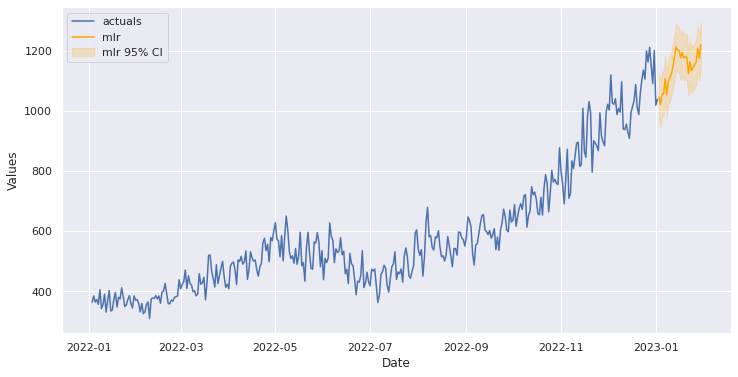

In [96]:
f_daily.plot(models='mlr',ci=True)

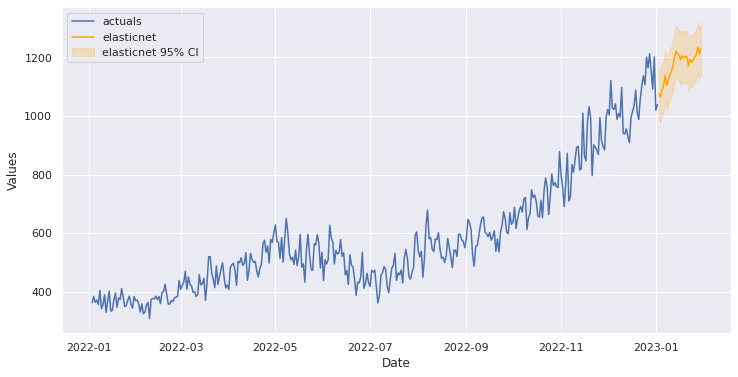

In [97]:
f_daily.plot(models='elasticnet',ci=True)

# Approach 2 : Multivariable Forcasting

In [98]:
daily.columns

Index(['order_date', 'order_date_of_month', 'dow', 'orders', 'delivery_fee',
       'restaurant_id', 'food_price', 'is_coupon_used', 'is_bkk',
       'is_chain_res', 'is_main_dish', 'CASH', 'LINEMAN_CREDIT_CARD', 'RLP',
       'L', 'M', 'S', 'cooking_time_in_seconds_trf',
       'delivery_time_in_seconds_trf', 'total_time_waiting', '%_coupon_used',
       '%_chain_res', '%_S_resturant_orders', '%_L_resturant_orders',
       'orders_per_rest', '%_CASH', 'fake_date'],
      dtype='object')

In [99]:
f_orders_d = f_daily
f_deliver_fee_d = Forecaster(y=daily['delivery_fee'],current_dates=daily['fake_date'])
f_food_price_d = Forecaster(y=daily['food_price'],current_dates=daily['fake_date'])
f_cash_d = Forecaster(y=daily['%_CASH'],current_dates=daily['fake_date'])
f_waiting_d = Forecaster(y=daily['total_time_waiting'],current_dates=daily['fake_date'])

In [100]:
mvf = MVForecaster(f_orders_d,f_deliver_fee_d,f_food_price_d,f_cash_d,f_waiting_d,names=['Orders','delivery_fee','food_price','%_CASH','total_time_waiting'])

In [101]:
mvf.set_test_length(.2)
mvf.set_validation_length(4)

In [102]:
mvf.set_optimize_on('Orders')
mvf.set_optimize_on('mean')

In [103]:
mvf.tune_test_forecast(models)

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinat

[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_resul

In [104]:
# mvf.set_best_model(determine_best_by='LevelTestSetMAPE')

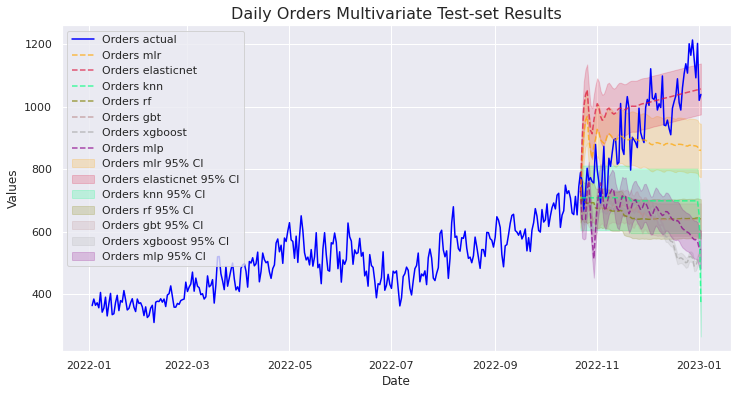

In [105]:
mvf.plot_test_set(series='Orders',
                  ci=True)
plt.title('Daily Orders Multivariate Test-set Results',size=16)
plt.show()

In [106]:
models

('mlr', 'elasticnet', 'knn', 'rf', 'gbt', 'xgboost', 'mlp')

In [107]:
mvf.corr()

,Orders,delivery_fee,food_price,%_CASH,total_time_waiting
Orders,1.000000,-0.576834,0.424786,-0.693477,-0.640039
delivery_fee,-0.576834,1.000000,-0.189544,0.520459,0.532650
food_price,0.424786,-0.189544,1.000000,-0.310998,-0.143425
%_CASH,-0.693477,0.520459,-0.310998,1.000000,0.572192
total_time_waiting,-0.640039,0.532650,-0.143425,0.572192,1.000000


<Figure size 1500x1200 with 0 Axes>

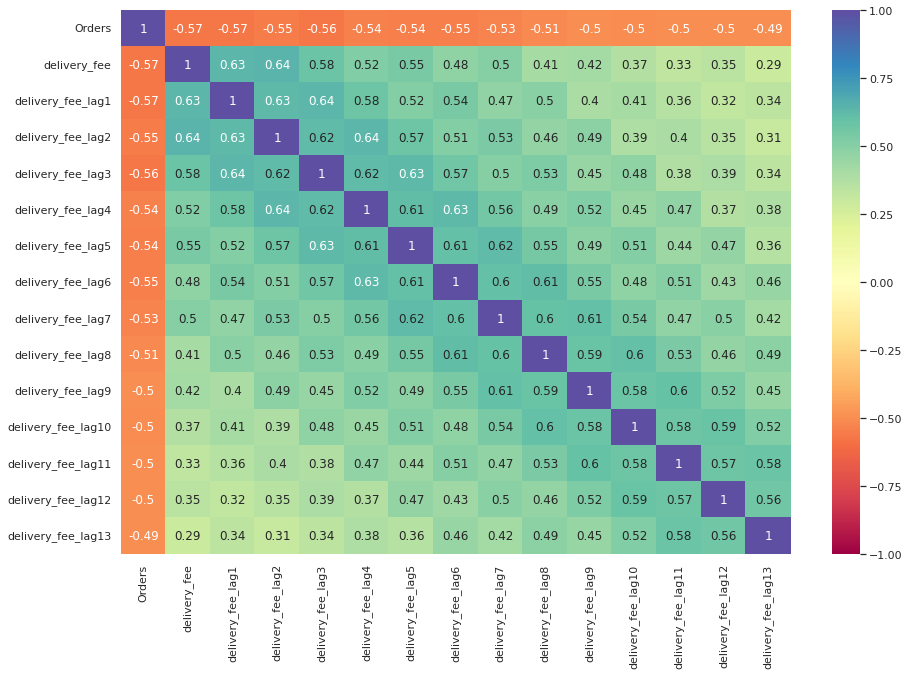

In [108]:
fig = plt.figure(figsize=(15, 12), dpi=100)

mvf.corr_lags(
    y='Orders',
    x='delivery_fee',
    lags=13,
    disp='heatmap',
    annot=True,
    vmin=-1,
    vmax=1,
    cmap = 'Spectral',
)
plt.show()

In [109]:
pd.options.display.max_colwidth = 100
results = mvf.export('model_summaries')
results[
    [
        'ModelNickname',
        'Series',
        'HyperParams',
        'LevelTestSetMAPE',
        'LevelTestSetR2',
        'InSampleMAPE',
        'InSampleR2',
        'Lags'
    ]
]

,ModelNickname,Series,HyperParams,LevelTestSetMAPE,LevelTestSetR2,InSampleMAPE,InSampleR2,Lags
0,mlr,Orders,{},0.132323,-0.265346,0.057732,0.954416,6
1,elasticnet,Orders,"{'alpha': 2, 'l1_ratio': 0}",0.125562,0.015127,0.059589,0.951092,6
2,knn,Orders,{'n_neighbors': 7},0.239962,-3.336784,0.058467,0.953072,1
3,rf,Orders,"{'max_depth': 5, 'n_estimators': 100, 'max_features': 'auto', 'max_samples': 0.75}",0.283666,-4.597972,0.048729,0.972443,3
4,gbt,Orders,"{'max_depth': 2, 'max_features': None}",0.282029,-4.508025,0.041296,0.980038,6
5,xgboost,Orders,"{'n_estimators': 250, 'scale_pos_weight': 10, 'learning_rate': 0.1, 'gamma': 3, 'subsample': 0.8}",0.309886,-6.244063,0.010930,0.998678,6
6,mlp,Orders,"{'activation': 'relu', 'hidden_layer_sizes': (25, 25), 'solver': 'lbfgs'}",0.279421,-4.773446,0.049824,0.965552,6
7,mlr,delivery_fee,{},NaN,-0.332239,NaN,0.591956,6
8,elasticnet,delivery_fee,"{'alpha': 2, 'l1_ratio': 0}",NaN,-0.870328,NaN,0.577291,6
9,knn,delivery_fee,{'n_neighbors': 7},NaN,-0.137058,NaN,0.637537,1


In [110]:
results

,Series,ModelNickname,Estimator,Xvars,HyperParams,Lags,Scaler,Observations,Tuned,CrossValidated,...,ValidationMetric,ValidationMetricValue,LevelTestSetRMSE,LevelTestSetMAPE,LevelTestSetMAE,LevelTestSetR2,LevelInSampleRMSE,LevelInSampleMAPE,LevelInSampleMAE,LevelInSampleR2
0,Orders,mlr,mlr,"[weeksin, weekcos, monthsin, monthcos]",{},6,None,365,True,False,...,rmse,27.137680,151.319886,0.132323,125.732295,-0.265346,43.709726,0.057732,33.061597,0.954416
1,Orders,elasticnet,elasticnet,"[weeksin, weekcos, monthsin, monthcos]","{'alpha': 2, 'l1_ratio': 0}",6,None,365,True,False,...,rmse,24.760266,133.500013,0.125562,105.981884,0.015127,45.275249,0.059589,34.290020,0.951092
2,Orders,knn,knn,"[weeksin, weekcos, monthsin, monthcos]",{'n_neighbors': 7},1,minmax,365,True,False,...,rmse,63.992220,280.140033,0.239962,240.125245,-3.336784,44.369498,0.058467,33.766876,0.953072
3,Orders,rf,rf,"[weeksin, weekcos, monthsin, monthcos]","{'max_depth': 5, 'n_estimators': 100, 'max_features': 'auto', 'max_samples': 0.75}",3,minmax,365,True,False,...,rmse,69.340021,318.278031,0.283666,281.662015,-4.597972,33.993418,0.048729,26.949627,0.972443
4,Orders,gbt,gbt,"[weeksin, weekcos, monthsin, monthcos]","{'max_depth': 2, 'max_features': None}",6,minmax,365,True,False,...,rmse,61.699951,315.710674,0.282029,279.750089,-4.508025,28.924827,0.041296,22.956830,0.980038
5,Orders,xgboost,xgboost,"[weeksin, weekcos, monthsin, monthcos]","{'n_estimators': 250, 'scale_pos_weight': 10, 'learning_rate': 0.1, 'gamma': 3, 'subsample': 0.8}",6,minmax,365,True,False,...,rmse,65.616719,362.061550,0.309886,309.939960,-6.244063,7.444737,0.010930,5.859341,0.998678
6,Orders,mlp,mlp,"[weeksin, weekcos, monthsin, monthcos]","{'activation': 'relu', 'hidden_layer_sizes': (25, 25), 'solver': 'lbfgs'}",6,minmax,365,True,False,...,rmse,31.865081,323.227900,0.279421,278.653910,-4.773446,37.997494,0.049824,28.637928,0.965552
7,delivery_fee,mlr,mlr,"[weeksin, weekcos, monthsin, monthcos]",{},6,None,365,True,False,...,rmse,27.137680,4.080056,NaN,3.623526,-0.332239,2.251382,NaN,1.596961,0.591956
8,delivery_fee,elasticnet,elasticnet,"[weeksin, weekcos, monthsin, monthcos]","{'alpha': 2, 'l1_ratio': 0}",6,None,365,True,False,...,rmse,24.760266,4.834304,NaN,3.750699,-0.870328,2.291481,NaN,1.608203,0.577291
9,delivery_fee,knn,knn,"[weeksin, weekcos, monthsin, monthcos]",{'n_neighbors': 7},1,minmax,365,True,False,...,rmse,63.992220,3.769349,NaN,3.088063,-0.137058,2.112852,NaN,1.249215,0.637537


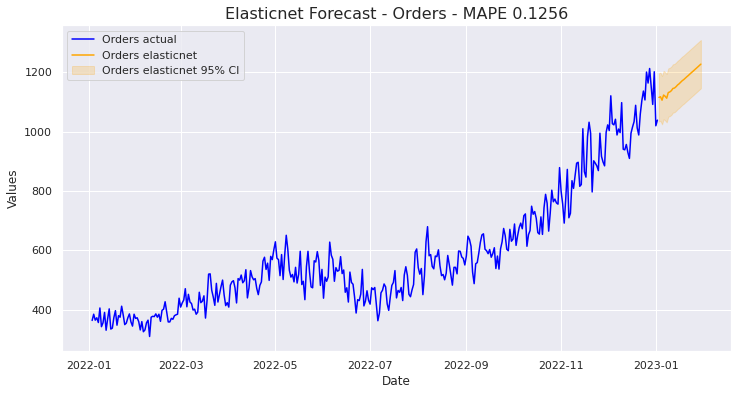

In [111]:
mvf.plot(series='Orders',models='elasticnet',ci=True)
plt.title('Elasticnet Forecast - Orders - MAPE 0.1256',size=16)
plt.show()

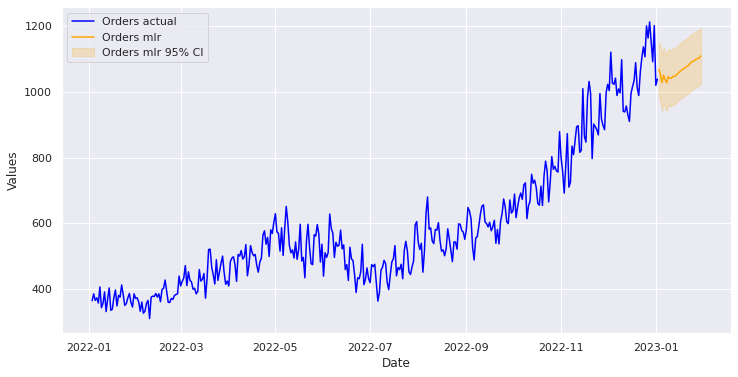

In [147]:
mvf.plot(series='Orders',models='mlr',ci=True)
plt.show()

In [113]:
print('-'*100)
for series in results['Series'].unique():
    print('multivariate average test MAPE for {}: {:.4f}'.format(series,results.loc[results['Series'] == series,'LevelTestSetMAPE'].mean()))
    print('multivariate average test R2 for {}: {:.2f}'.format(series,results.loc[results['Series'] == series,'LevelTestSetR2'].mean()))
    print('-'*100)


----------------------------------------------------------------------------------------------------
multivariate average test MAPE for Orders: 0.2361
multivariate average test R2 for Orders: -3.39
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for delivery_fee: nan
multivariate average test R2 for delivery_fee: -0.97
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for food_price: 0.0820
multivariate average test R2 for food_price: -2.50
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for %_CASH: 0.0999
multivariate average test R2 for %_CASH: -3.57
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for total_time_waiting: 0.0546
multivariate average test R2

In [114]:
mvf.set_estimator('elasticnet')
mvf.manual_forecast()
mvf.backtest('elasticnet')
backtest_metrics = mvf.export_backtest_metrics('elasticnet')
backetest_values = mvf.export_backtest_values('elasticnet')

  value_results[f"{s}_iter{i+1}actuals"] = test_preds[f"{s}_actuals"]

  value_results[f"{s}_iter{i+1}preds"] = test_preds[f"{s}_{model}_lvl_ts"]

  value_results[f"{s}_iter{i+1}dates"] = test_preds["DATE"]

  value_results[f"{s}_iter{i+1}dates"] = test_preds["DATE"]

  value_results[f"{s}_iter{i+1}actuals"] = test_preds[f"{s}_actuals"]

  value_results[f"{s}_iter{i+1}preds"] = test_preds[f"{s}_{model}_lvl_ts"]

  value_results[f"{s}_iter{i+1}dates"] = test_preds["DATE"]

  value_results[f"{s}_iter{i+1}actuals"] = test_preds[f"{s}_actuals"]

  value_results[f"{s}_iter{i+1}preds"] = test_preds[f"{s}_{model}_lvl_ts"]

  value_results[f"{s}_iter{i+1}dates"] = test_preds["DATE"]

  value_results[f"{s}_iter{i+1}actuals"] = test_preds[f"{s}_actuals"]

  value_results[f"{s}_iter{i+1}preds"] = test_preds[f"{s}_{model}_lvl_ts"]



In [115]:
backtest_metrics

iter1       iter2       iter3       iter4  \
series             metric                                                   
Orders             RMSE    487.496388  488.809797  490.276555  489.618766   
                   MAE     479.661024  480.933844  482.338714  482.781471   
                   R2      -32.135084  -32.207474    -32.4709  -35.687869   
                   MAPE      0.452603    0.454037    0.455261    0.457398   
delivery_fee       RMSE      7.304636    7.169025    7.030358    6.888446   
                   MAE       6.988095    6.819616    6.651198     6.48284   
                   R2      -10.793754   -9.515036    -8.52789   -7.749138   
                   MAPE           NaN         NaN         NaN         NaN   
food_price         RMSE     10.258994    11.00204   10.760625   11.551477   
                   MAE       8.305727    9.067773    8.931182    9.442843   
                   R2       -1.143169   -1.298873   -1.301452   -1.238697   
                   MAPE      0.056729    0.061648    0.060861    0.063893   
%_CASH             RMSE      0.103064    0.104675    0.105122     0.10672   
                   MAE       0.095836    0.098163    0.098676    0.101062   
                   R2       -6.388413   -7.294527   -7.412199   -8.688296   
                   MAPE      0.133778    0.137098    0.137832    0.141225   
total_time_waiting RMSE    110.542747  108.593279  107.699668  106.364168   
                   MAE     106.863436  104.614664  102.844356  100.481599   
                   R2      -14.510446  -13.598072  -11.338221   -8.971485   
                   MAPE      0.097084    0.094882    0.093279    0.091115   

                                iter5       iter6       iter7       iter8  \
series             metric                                                   
Orders             RMSE    488.552036  484.571667  477.854081  469.405899   
                   MAE     481.359338  477.819242  472.144253   463.10522   
                   R2      -35.577189  -37.362009  -44.099137  -41.959979   
                   MAPE      0.457296    0.456143    0.454518    0.449791   
delivery_fee       RMSE      6.704876    6.555019     6.57819     6.42431   
                   MAE       6.234725     6.06571    6.089394    5.920538   
                   R2       -5.002215   -4.702916   -4.743305   -4.491694   
                   MAPE           NaN         NaN         NaN         NaN   
food_price         RMSE     11.836894   11.775663   11.932459   12.231255   
                   MAE       9.755221    9.671245    9.835626   10.321514   
                   R2       -1.319974   -1.296034   -1.318992   -1.523828   
                   MAPE      0.065914    0.065328    0.066372    0.069638   
%_CASH             RMSE      0.108048    0.110443    0.111385    0.113799   
                   MAE       0.102868     0.10625    0.107478    0.110542   
                   R2       -9.686388  -12.426688  -13.508303  -16.724852   
                   MAPE      0.143831    0.148733    0.150513    0.155069   
total_time_waiting RMSE    103.749603   99.868879    99.35586   95.449146   
                   MAE      96.269138   92.210614   91.976661   87.102326   
                   R2       -6.772924   -6.256449   -6.242144   -5.459548   
                   MAPE      0.087236    0.083303    0.083027    0.078421   

                                iter9      iter10        mean  
series             metric                                      
Orders             RMSE    459.332759  453.589402  478.950735  
                   MAE     453.799761   447.95135  472.189422  
                   R2      -46.578438  -45.882875  -38.396095  
                   MAPE      0.445727    0.442913    0.452569  
delivery_fee       RMSE      6.447626    6.289446    6.739193  
                   MAE       5.944469    5.775775    6.297236  
                   R2       -4.531629   -4.322256   -6.437983  
                   MAPE           NaN         NaN         NaN  
fo

In [144]:
export_daily = mvf.export(dfs=['all_fcsts','model_summaries','test_set_predictions','lvl_test_set_predictions','lvl_fcsts'],to_excel=True)

In [117]:
export_daily

{'model_summaries':                 Series ModelNickname   Estimator  \
 0               Orders           mlr         mlr   
 1               Orders    elasticnet  elasticnet   
 2               Orders           knn         knn   
 3               Orders            rf          rf   
 4               Orders           gbt         gbt   
 5               Orders       xgboost     xgboost   
 6               Orders           mlp         mlp   
 7         delivery_fee           mlr         mlr   
 8         delivery_fee    elasticnet  elasticnet   
 9         delivery_fee           knn         knn   
 10        delivery_fee            rf          rf   
 11        delivery_fee           gbt         gbt   
 12        delivery_fee       xgboost     xgboost   
 13        delivery_fee           mlp         mlp   
 14          food_price           mlr         mlr   
 15          food_price    elasticnet  elasticnet   
 16          food_price           knn         knn   
 17          food_price    

# Forecast Weekly

In [118]:
f_weekly = Forecaster(y=weekly['orders'],current_dates=weekly['fake_week'])
f_weekly

Forecaster(
    DateStartActuals=2022-01-03T00:00:00.000000000
    DateEndActuals=2022-12-26T00:00:00.000000000
    Freq=W-MON
    N_actuals=52
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

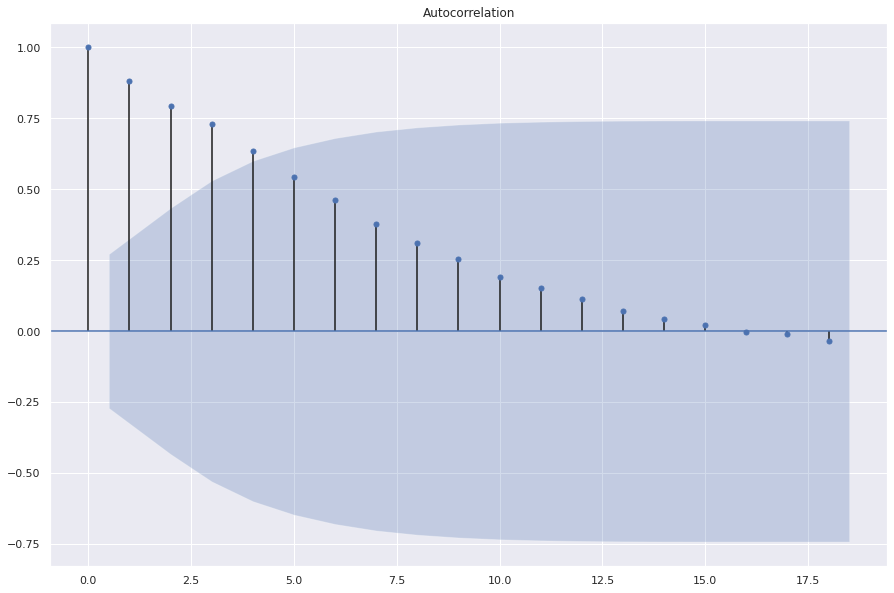

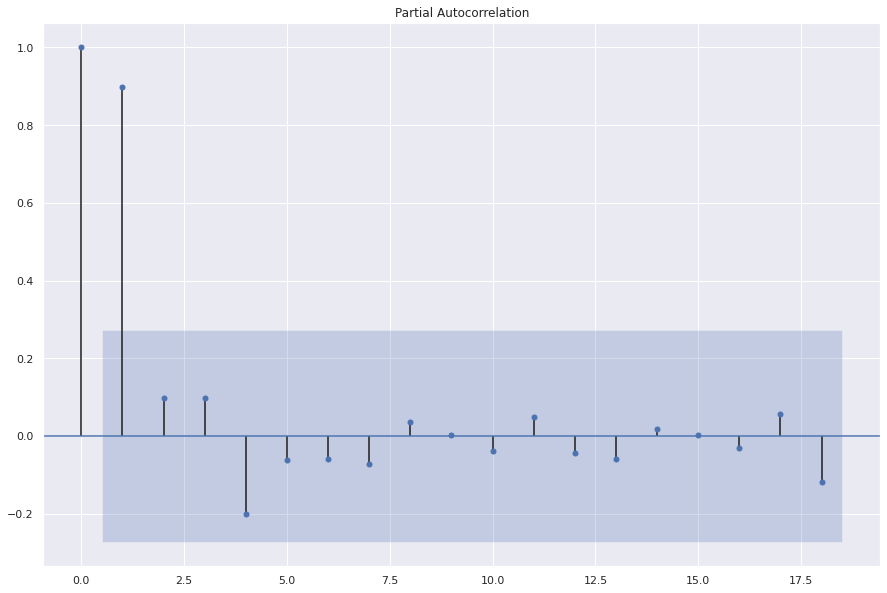

In [119]:
f_weekly.plot_acf()
f_weekly.plot_pacf()
plt.show()

In [120]:
# set forecast horizon of 26 weeks
f_weekly.generate_future_dates(26)    
# set 20% testing length    
f_weekly.set_test_length(.2)
# set aside 4 days for validation
f_weekly.set_validation_length(20)
f_weekly.add_seasonal_regressors(
        'month',
        'quarter',
        raw=False,
        sincos=True,
    )
f_weekly.add_ar_terms(4)

## Weekly Univariable

In [121]:
f_weekly.tune_test_forecast(models,feature_importance=True)

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinat

[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

  warnings.warn(

  warnings.warn(

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

  warnings.warn(

  warnings.warn(

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

In [122]:
f_weekly.set_estimator('combo')
f_weekly.manual_forecast(how='weighted')

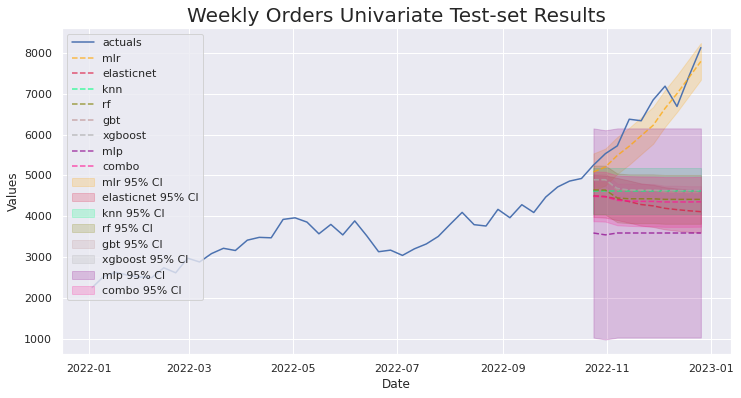

In [123]:
f_weekly.plot_test_set(ci=True)
plt.title('Weekly Orders Univariate Test-set Results',size=20)
plt.show()

In [124]:
results = f_weekly.export('model_summaries')
results


,ModelNickname,Estimator,Xvars,HyperParams,Scaler,Observations,Tuned,CrossValidated,DynamicallyTested,Integration,...,weights,LevelTestSetRMSE,LevelTestSetMAPE,LevelTestSetMAE,LevelTestSetR2,LevelInSampleRMSE,LevelInSampleMAPE,LevelInSampleMAE,LevelInSampleR2,best_model
0,mlr,mlr,"[monthsin, monthcos, quartersin, quartercos, AR1, AR2, AR3, AR4]",{},None,52,True,False,True,0,...,None,407.090172,0.055255,360.401430,0.771848,230.078686,0.045350,180.682298,9.719861e-01,True
1,xgboost,xgboost,"[monthsin, monthcos, quartersin, quartercos, AR1, AR2, AR3, AR4]","{'n_estimators': 200, 'scale_pos_weight': 5, 'learning_rate': 0.1, 'gamma': 5, 'subsample': 0.9}",minmax,52,True,False,True,0,...,None,2079.356673,0.269866,1858.958936,-4.952516,16.364639,0.003373,12.968297,9.998583e-01,False
2,gbt,gbt,"[monthsin, monthcos, quartersin, quartercos, AR1, AR2, AR3, AR4]","{'max_depth': 2, 'max_features': 'sqrt'}",minmax,52,True,False,True,0,...,None,2106.987496,0.273446,1883.554624,-5.111763,78.141959,0.015728,61.854774,9.967686e-01,False
3,knn,knn,"[monthsin, monthcos, quartersin, quartercos, AR1, AR2, AR3, AR4]",{'n_neighbors': 5},minmax,52,True,False,True,0,...,None,2117.673044,0.283932,1938.600000,-5.173912,251.624351,0.049883,203.587500,9.664937e-01,False
4,rf,rf,"[monthsin, monthcos, quartersin, quartercos, AR1, AR2, AR3, AR4]","{'max_depth': 2, 'n_estimators': 100, 'max_features': 'auto', 'max_samples': 0.75}",minmax,52,True,False,True,0,...,None,2278.902134,0.305196,2084.877547,-6.149801,287.231774,0.058248,221.008160,9.563397e-01,False
5,combo,combo,None,{'how': 'weighted'},None,52,False,False,None,0,...,"(0.19593797992916684, 0.18335153460196443, 0.18136965262913607, 0.18093422538296158, 0.159640806...",2342.605153,0.318355,2165.855731,-6.555110,352.061883,0.067574,274.068676,9.344067e-01,False
6,elasticnet,elasticnet,"[monthsin, monthcos, quartersin, quartercos, AR1, AR2, AR3, AR4]","{'alpha': 2, 'l1_ratio': 0}",scale,52,True,False,True,0,...,None,2465.272973,0.331412,2261.369851,-7.367055,290.065040,0.058742,233.606012,9.554741e-01,False
7,mlp,mlp,"[monthsin, monthcos, quartersin, quartercos, AR1, AR2, AR3, AR4]","{'activation': 'tanh', 'hidden_layer_sizes': (25, 25), 'solver': 'lbfgs'}",minmax,52,True,False,True,0,...,None,3085.396340,0.443751,2966.890480,-12.105830,1374.640862,0.255240,1069.808562,-6.074918e-12,False


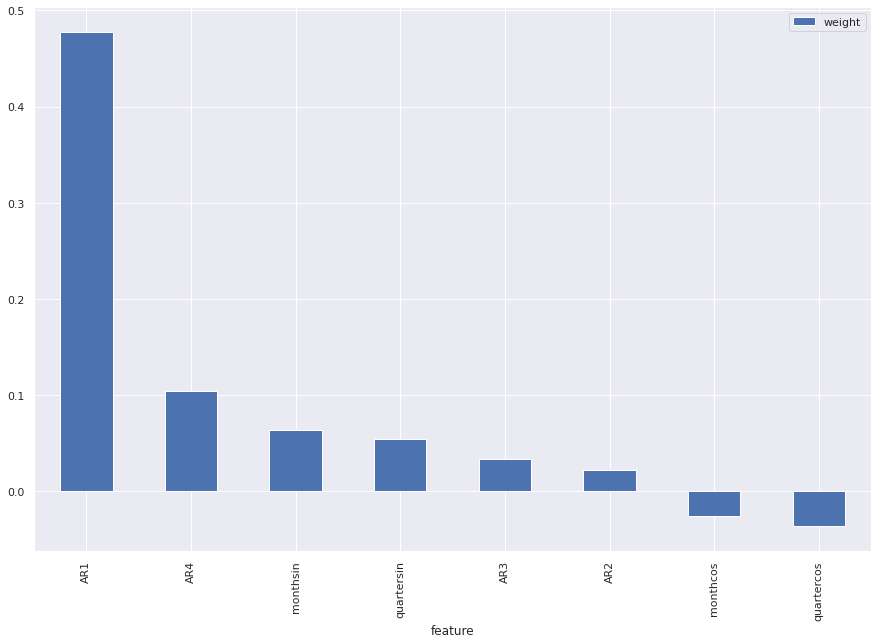

In [125]:
f_weekly.export_feature_importance('mlr').plot.bar(y='weight')
plt.show()

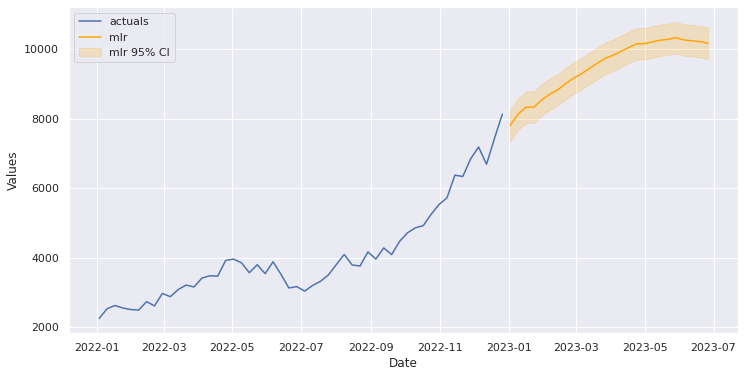

In [126]:
f_weekly.plot(models='mlr',ci=True)
plt.show()

# Hourly

In [127]:
start_hour = hourly['fake_hour'].min()
end_hour = hourly['fake_hour'].max()

In [128]:
hourly_fillzero = pd.DataFrame({},index=pd.date_range(start_hour, periods=(24*365), freq="H")).reset_index()
hourly_fillzero = pd.merge(hourly_fillzero, hourly, left_on='index', right_on='fake_hour', how='left')
# hourly_fillzero.drop(columns=['index'], inplace=True)

In [129]:
hourly_fillzero['orders'] = hourly_fillzero['orders'].fillna(0)
# hourly_fillzero = hourly_fillzero[~hourly_fillzero['hrs_index'].isna()]
# hourly_fillzero['fake_hour'] = hourly_fillzero['index'].apply(lambda x : dt0+timedelta(hours=x-1))

In [130]:
hourly_q4 = hourly_fillzero[hourly_fillzero['fake_hour'] >= datetime(2022,11,1,0,0,0)]

In [131]:
f_hourly_q4 = Forecaster(y=hourly_q4['orders'],current_dates=hourly_q4['index'])
f_hourly = Forecaster(y=hourly_fillzero['orders'],current_dates=hourly_fillzero['index'])

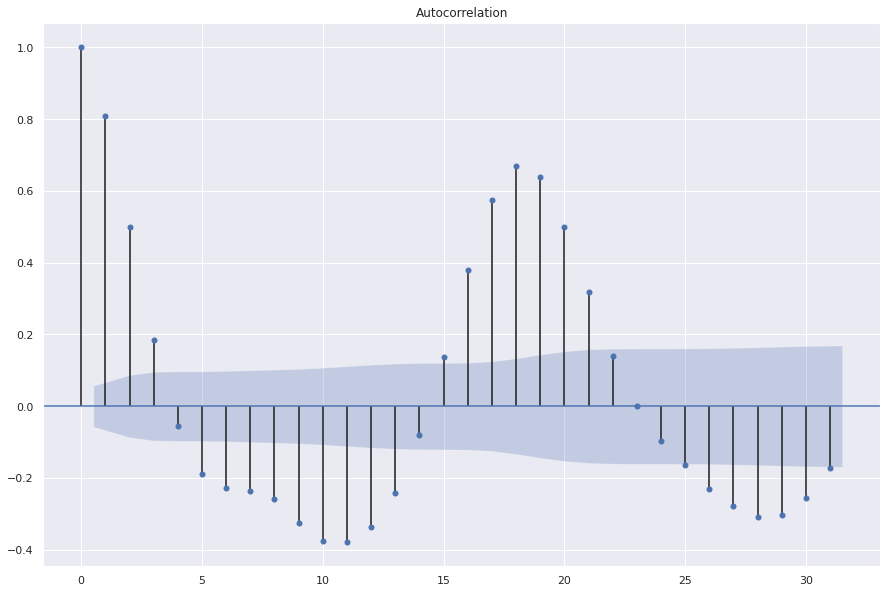

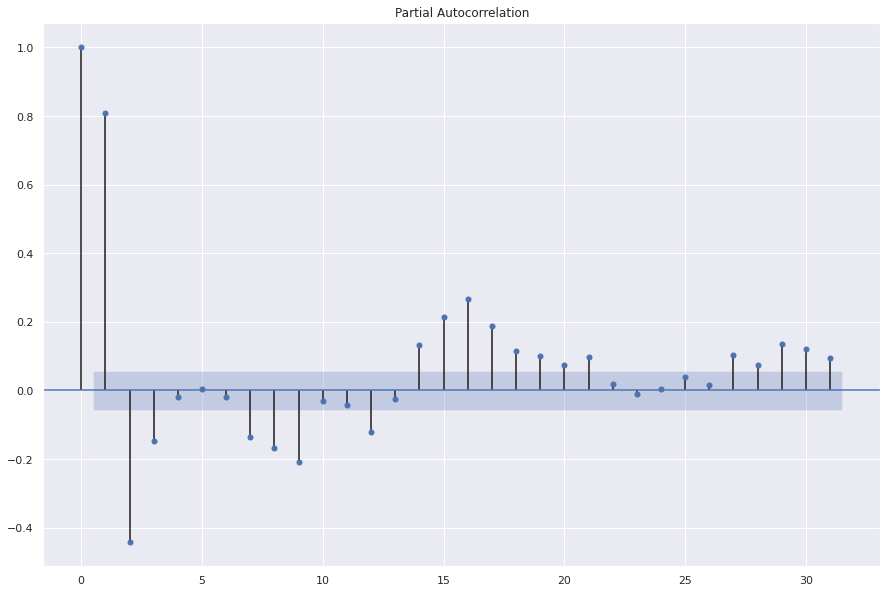

In [132]:
f_hourly_q4.plot_acf()
f_hourly_q4.plot_pacf()
plt.show()

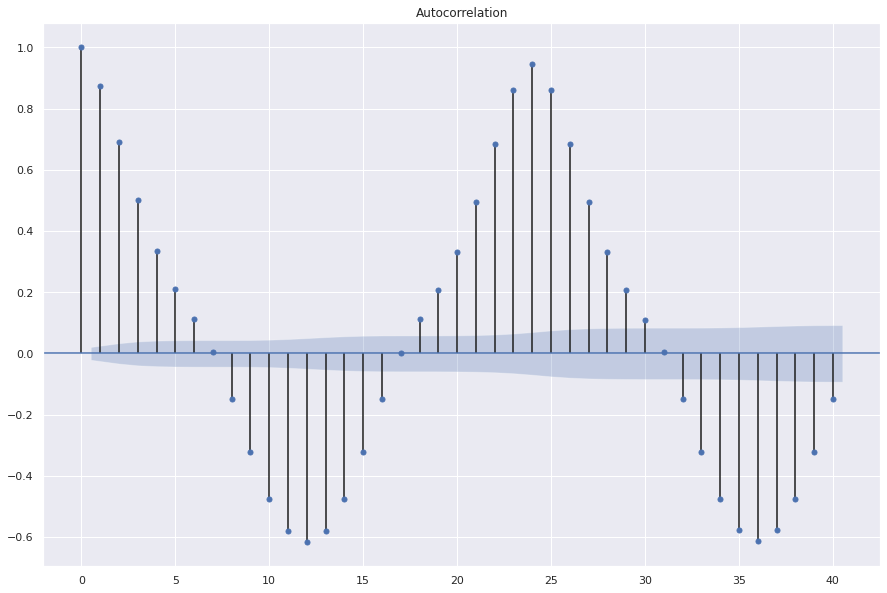

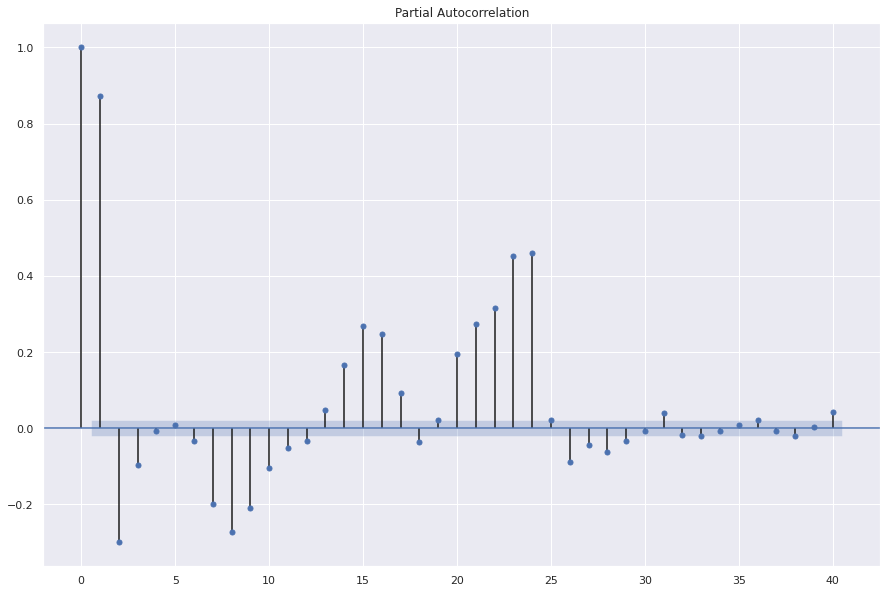

In [133]:
f_hourly.plot_acf()
f_hourly.plot_pacf()
plt.show()

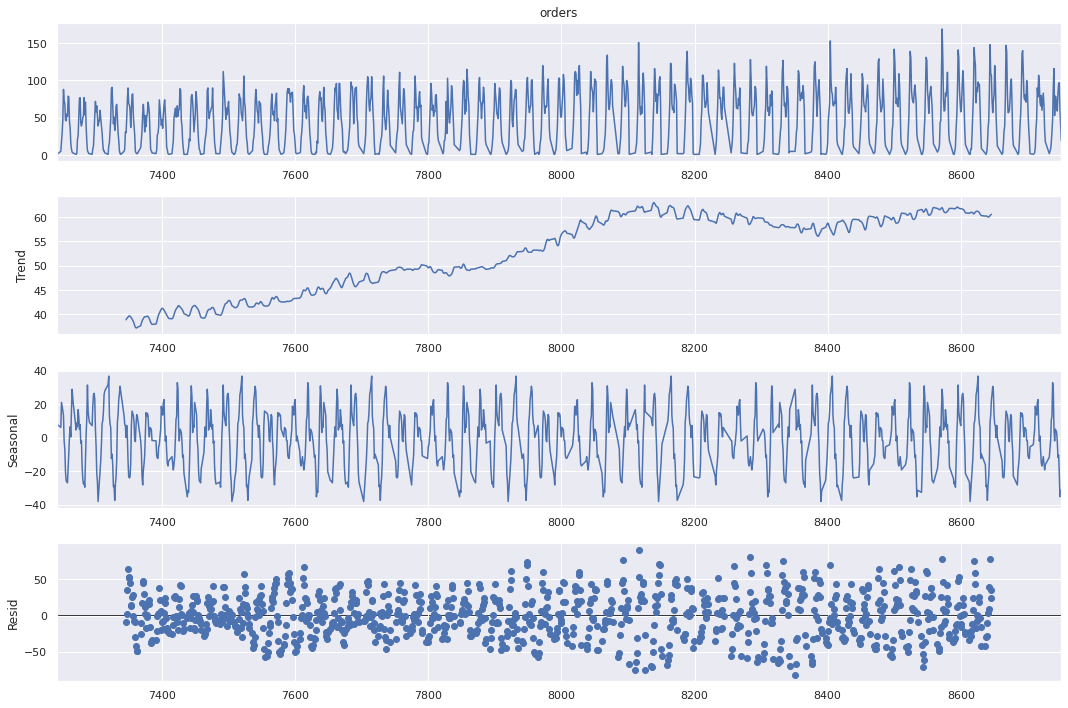

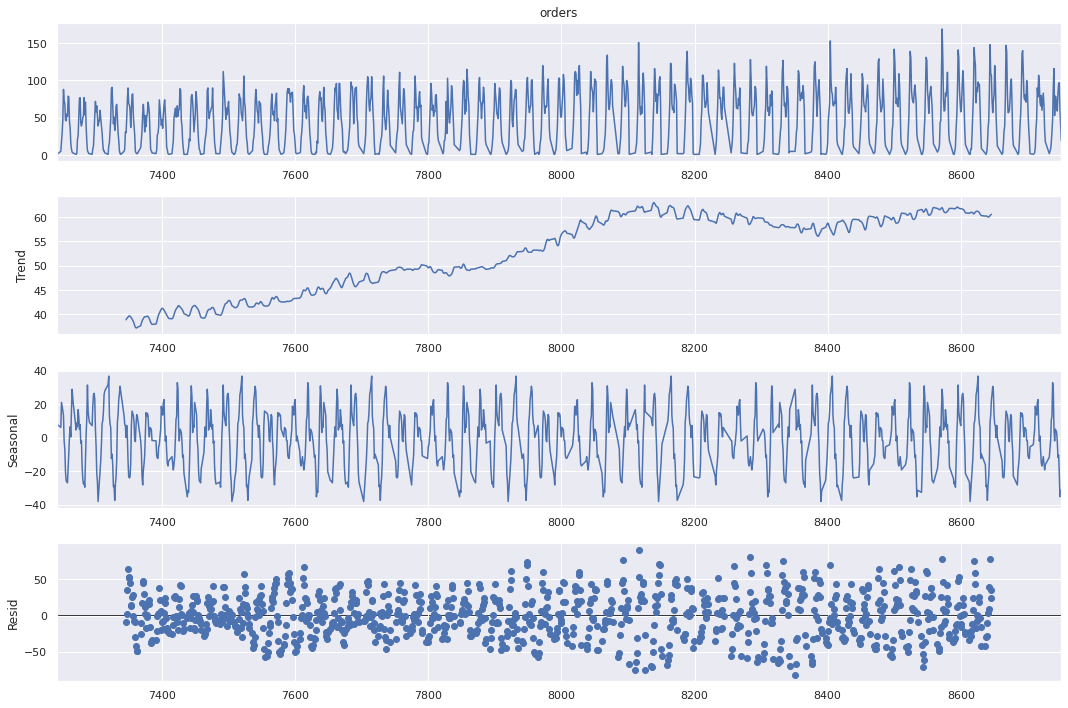

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

orders_trunc = hourly_q4['orders']
# orders_inter = orders_after_hr6500.fillna(orders_after_hr6500.interpolate())

result = seasonal_decompose(orders_trunc, period=168)
result.plot()

In [135]:
for f in [f_hourly,f_hourly_q4]:
  # set forecast horizon of 72 hours
  f.generate_future_dates(72)    
  # set 20% testing length    
  f.set_test_length(.2)
  # set aside 4 days for validation
  f.set_validation_length(20)
  f.add_seasonal_regressors(
          'week',
          'month',
          raw=False,
          sincos=True,
      )
  f.add_ar_terms(24)

In [136]:
for f in [f_hourly,f_hourly_q4]:
    f.tune_test_forecast(models,feature_importance=True)

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinate_descent(

  model = cd_fast.enet_coordinat

[13:01:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

  warnings.warn(

  warnings.warn(

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  

[13:05:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

  warnings.warn(

  warnings.warn(

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  

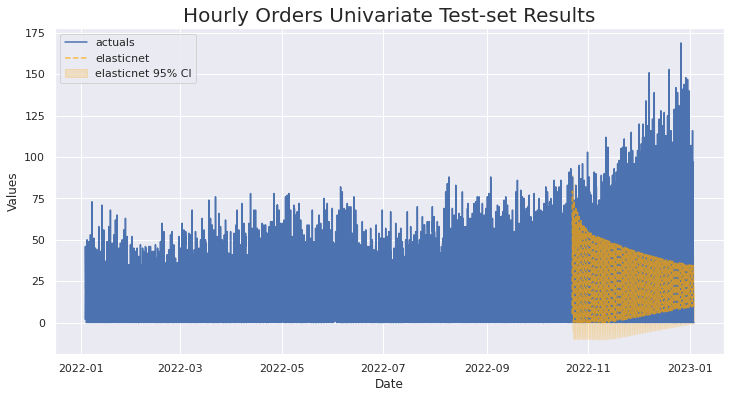

In [137]:
f_hourly.plot_test_set(ci=True,order_by='LevelTestSetMAPE',models='elasticnet')
plt.title('Hourly Orders Univariate Test-set Results',size=20)
plt.show()

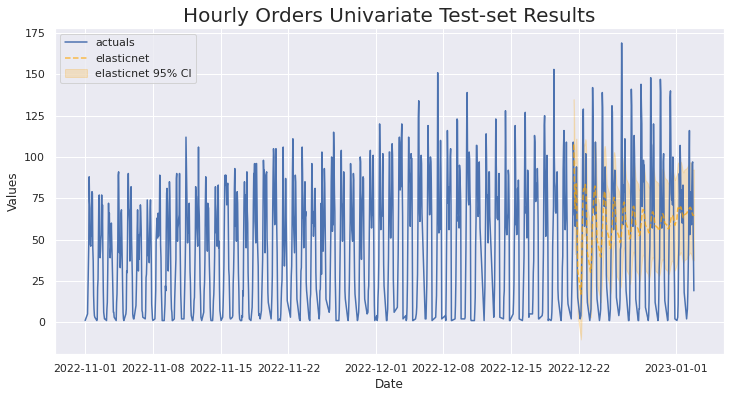

In [138]:
f_hourly_q4.plot_test_set(ci=True,models='elasticnet')
plt.title('Hourly Orders Univariate Test-set Results',size=20)
plt.show()

In [139]:
results = f_hourly_q4.export('model_summaries')
results

,ModelNickname,Estimator,Xvars,HyperParams,Scaler,Observations,Tuned,CrossValidated,DynamicallyTested,Integration,...,weights,LevelTestSetRMSE,LevelTestSetMAPE,LevelTestSetMAE,LevelTestSetR2,LevelInSampleRMSE,LevelInSampleMAPE,LevelInSampleMAE,LevelInSampleR2,best_model
0,elasticnet,elasticnet,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'alpha': 0.2, 'l1_ratio': 1}",scale,1170,True,False,True,0,...,None,3.609877e+01,4.392212e+00,2.844663e+01,1.815191e-01,15.678498,1.127587,11.619258,0.806895,True
1,gbt,gbt,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'max_depth': 3, 'max_features': None}",minmax,1170,True,False,True,0,...,None,3.917789e+01,5.166729e+00,3.197781e+01,3.593629e-02,8.195298,0.456872,6.144547,0.947239,False
2,xgboost,xgboost,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'n_estimators': 250, 'scale_pos_weight': 5, 'learning_rate': 0.2, 'gamma': 3, 'subsample': 0.9}",minmax,1170,True,False,True,0,...,None,4.002500e+01,5.431444e+00,3.289139e+01,-6.204456e-03,3.657887,0.168007,2.761451,0.989489,False
3,rf,rf,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'max_depth': 5, 'n_estimators': 100, 'max_features': 'auto', 'max_samples': 0.9}",minmax,1170,True,False,True,0,...,None,4.064290e+01,5.956308e+00,3.209431e+01,-3.751173e-02,10.632114,0.562052,7.802398,0.911198,False
4,mlp,mlp,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'activation': 'relu', 'hidden_layer_sizes': (25,), 'solver': 'lbfgs'}",minmax,1170,True,False,True,0,...,None,4.386725e+01,5.169557e+00,3.559356e+01,-2.086609e-01,9.756295,0.536556,7.242446,0.925225,False
5,knn,knn,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...",{'n_neighbors': 15},minmax,1170,True,False,True,0,...,None,4.855378e+01,4.790552e+00,3.858148e+01,-4.807090e-01,13.562010,0.691299,9.885922,0.855512,False
6,mlr,mlr,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...",{},minmax,1170,True,False,True,0,...,None,2.216199e+13,8.139134e+11,7.817735e+12,-3.084901e+23,15.572255,1.096799,11.549818,0.809504,False


In [145]:
f_hourly_q4.export(to_excel=True)

{'model_summaries':   ModelNickname   Estimator  \
 0    elasticnet  elasticnet   
 1           gbt         gbt   
 2       xgboost     xgboost   
 3            rf          rf   
 4           mlp         mlp   
 5           knn         knn   
 6           mlr         mlr   
 
                                                                                                  Xvars  \
 0  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 1  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 2  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 3  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 4  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...   
 5  [weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8

In [140]:
results = f_hourly.export('model_summaries')
results

,ModelNickname,Estimator,Xvars,HyperParams,Scaler,Observations,Tuned,CrossValidated,DynamicallyTested,Integration,...,weights,LevelTestSetRMSE,LevelTestSetMAPE,LevelTestSetMAE,LevelTestSetR2,LevelInSampleRMSE,LevelInSampleMAPE,LevelInSampleMAE,LevelInSampleR2,best_model
0,knn,knn,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...",{'n_neighbors': 19},minmax,8760,True,False,True,0,...,None,23.927442,NaN,14.938687,0.582229,5.945601,NaN,3.826170,0.943754,True
1,rf,rf,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'max_depth': 5, 'n_estimators': 100, 'max_features': 'auto', 'max_samples': 0.75}",minmax,8760,True,False,True,0,...,None,24.183756,NaN,16.110764,0.573231,6.860453,NaN,4.509870,0.925113,False
2,mlr,mlr,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...",{},minmax,8760,True,False,True,0,...,None,29.712991,NaN,19.132546,0.355774,6.818169,NaN,4.538618,0.926033,False
3,gbt,gbt,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'max_depth': 3, 'max_features': None}",minmax,8760,True,False,True,0,...,None,30.280882,NaN,19.546063,0.330913,6.034262,NaN,4.051991,0.942064,False
4,elasticnet,elasticnet,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'alpha': 0.1, 'l1_ratio': 1}",scale,8760,True,False,True,0,...,None,30.995879,NaN,20.526422,0.298943,6.854857,NaN,4.497163,0.925235,False
5,xgboost,xgboost,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'n_estimators': 250, 'scale_pos_weight': 10, 'learning_rate': 0.2, 'gamma': 3, 'subsample': 0.8}",minmax,8760,True,False,True,0,...,None,34.672318,NaN,23.656371,0.122774,4.958811,NaN,3.415703,0.960875,False
6,mlp,mlp,"[weeksin, weekcos, monthsin, monthcos, AR1, AR2, AR3, AR4, AR5, AR6, AR7, AR8, AR9, AR10, AR11, ...","{'activation': 'relu', 'hidden_layer_sizes': (25,), 'solver': 'lbfgs'}",scale,8760,True,False,True,0,...,None,110.129345,NaN,85.085232,-7.850171,5.978274,NaN,4.004332,0.943134,False


In [141]:
f_hourly_q4.export_feature_importance('gbt')

,weight,std
feature,,
AR12,0.002792,0.001293
AR22,0.000619,0.000287
AR14,-0.000322,0.002620
monthsin,-0.001238,0.000995
AR23,-0.001624,0.002193
weeksin,-0.005975,0.001986
AR19,-0.007569,0.000878
AR21,-0.007840,0.003071
weekcos,-0.010121,0.002399


In [142]:
f_hourly_q4

Forecaster(
    DateStartActuals=2022-11-01T00:00:00.000000000
    DateEndActuals=2023-01-02T21:00:00.000000000
    Freq=None
    N_actuals=1170
    ForecastLength=72
    Xvars=['weeksin', 'weekcos', 'monthsin', 'monthcos', 'AR1', 'AR2', 'AR3', 'AR4', 'AR5', 'AR6', 'AR7', 'AR8', 'AR9', 'AR10', 'AR11', 'AR12', 'AR13', 'AR14', 'AR15', 'AR16', 'AR17', 'AR18', 'AR19', 'AR20', 'AR21', 'AR22', 'AR23', 'AR24']
    Differenced=0
    TestLength=234
    ValidationLength=20
    ValidationMetric=rmse
    ForecastsEvaluated=['mlr', 'elasticnet', 'knn', 'rf', 'gbt', 'xgboost', 'mlp']
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=mlp
    GridsFile=Grids
)

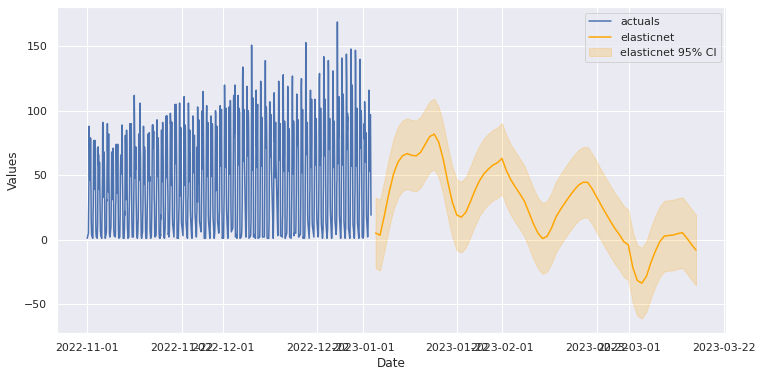

In [146]:
f_hourly_q4.plot(models='elasticnet',ci=True)